In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#建立步长为0.01，即每隔0.01取一个点
step = 0.01
x = np.arange(-10,10,step)
y = np.arange(-10,10,step)
#也可以用x = np.linspace(-10,10,100)表示从-10到10，分100份

#将原始数据变成网格数据形式
X,Y = np.meshgrid(x,y)
#写入函数，z是大写
Z = X**2+Y**2
#设置打开画布大小,长10，宽6
#plt.figure(figsize=(10,6))
#填充颜色，f即filled
plt.contourf(X,Y,Z)
#画等高线
plt.contour(X,Y,Z)
plt.show(


In [ ]:
print("It works well")
import netCDF4 as nc
file = '/Users/zhengkai/Desktop/new_after/Eoi350_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_all.nc'
dataset =nc.Dataset(file)
print(dataset)
THO=dataset.variables['THO'][0]
print(THO.shape)
# print(dataset.variables['lon'])
# print(THO[0][0][20][0])
# cdo
ax = plt.subplot(111)
im = ax.imshow(THO)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

In [79]:
# %reset


<xarray.Dataset>
Dimensions:  (lat: 180, lon: 1, plev: 40, time: 12)
Coordinates:
  * time     (time) datetime64[ns] 1949-01-31 1949-02-28 ... 1949-12-31
  * lon      (lon) float64 0.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * plev     (plev) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
Data variables:
    THO      (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Dec 21 21:39:58 2020: cdo -s -zonmean -sellonlatbox,-10...
    source:       MPIOM1
    institution:  Max-Planck-Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...
<xarray.DataArray 'time' (time: 12)>
array(['1949-01-31T00:00:00.000000000', '1949-02-28T00:00:00.000000000',
       '1949-03-31T00:00:00.000000000', '1949-04-30T00:00:00.000000000',
       '1949-05-31T00:00:00.000000000', '1949-06-

/opt/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Text(0.5, 1.0, 'ANN')

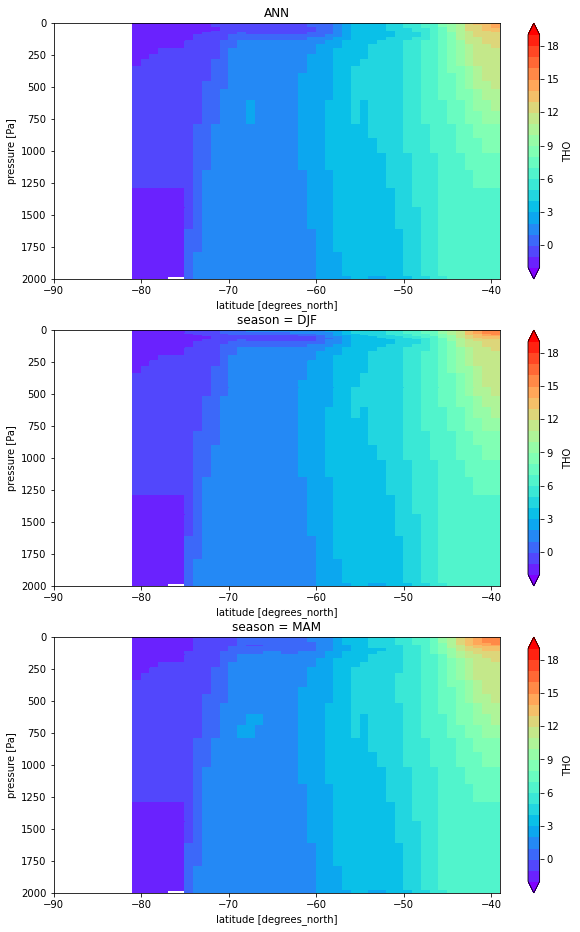

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
ds= xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi350_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_A.nc')
print(ds)
ds_season=ds.groupby('time.season').mean(dim=['time','lon'])['THO']
ds_ANN=ds.mean(dim=['time','lon'])['THO']
print(ds['time'])
# fig, axes = plt.subplots(ncols=1,nrows=4)
# ds_ANN.plot(figsize=(10,4))
# for i in range(4):
#     ds_season[i].plot(figsize=(8,4),yincrease=False)
# for i in range(4):
#     ds_season[i].plot(ax=axes[i],yincrease=False)

fig, axes = plt.subplots(ncols=1,nrows=3,figsize=(10,16))
levels=np.arange(-2,20,1)
# # print(levels)
x = np.arange(-90,-39,10)
print(x)
# print(list(x))  
labels=[str(i) +' S' if i<0 else str(i) +' N'  for  i in x]
print(labels)

ds_season[0].plot(ax=axes[1],yincrease=False,cmap='rainbow',levels=levels,extend='both')
axes[1].set_ylim(2000,0)
axes[1].set_xlim(-90,-39)
ds_season[2].plot(ax=axes[2],yincrease=False,cmap='rainbow',levels=levels,extend='both')
axes[2].set_ylim(2000,0)
axes[2].set_xlim(-90,-39)
# ds_ANN.plot(ax=axes[0],yincrease=False)
ds_ANN.plot(ax=axes[0],yincrease=False,cmap='rainbow',levels=levels,extend='both')
axes[0].set_ylim(2000,0)
axes[0].set_xlim(-90,-39)
axes[0].set_title("ANN") 

# #%%
# ds_ANN=ds.mean(dim=['time','lon','lat'])['THO']
# # ds_ANN.plot.line()
# fig, ax = plt.subplots(figsize=(6,10))
# ax.plot(ds_ANN,ds_ANN['plev'][:],color='k')
# ax.plot(ds_ANN,ds_ANN['plev'][:],marker='o',markersize=5, color='r',label='prefile')
# plt.legend()
# plt.ylim(2000,0)
# plt.ylabel("Depth")
# plt.xlabel("THO K")

# plt.show()
# # print(ds_ANN)
# # ds_ANN.plot.line( y="plev",figsize=(4,10),color='k',marker="o",yincrease=False)
# # ds_ANN.plot.line("b",marker="o")
# # plt.ylim(2000,0)


[-90 -80 -70 -60 -50 -40]
['-90 S', '-80 S', '-70 S', '-60 S', '-50 S', '-40 S']


Text(0.5, 1.0, 'Global')

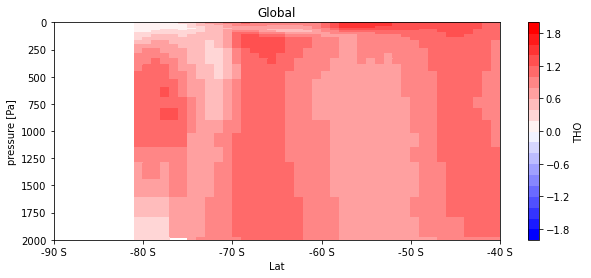

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
ds_1 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi350_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_A.nc')
ds_2 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi280_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_A.nc')
ds=ds_1-ds_2

# ds_1 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi400_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_A.nc')
# ds_2 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi350_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_A.nc')
# ds=ds_1-ds_2
# print(ds)
# # print(ds['THO'])#加不加[:]好像无所谓
# # print(ds['THO'][1][:])#从左到右取维度，左边必须去到维度，在右边才能用:
# print(ds['THO'][:,:,:,0])#和matlab一样
# print(ds['THO']['lat'][2:10])


# THO=ds['THO'][:,:,:,0]
# THO_ANN=np.mean(THO,axis=0)
# %reset
# print(THO_ANN) 
# ax = plt.subplot(111)
# im = ax.imshow(THO_ANN)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(im, cax=cax)


# THO_ANN=ds.mean(dim='time')
THO_ANN=ds.mean(dim=['time','lon'])['THO']
# print(THO_ANN)
levels=np.arange(-2,2.1,0.2)
fig=THO_ANN.plot(figsize = (10, 4),cmap=plt.get_cmap('bwr'),levels=levels,xincrease=True, yincrease=False)
# cmap https://matplotlib.org/tutorials/colors/colormaps.html
plt.xlim(-90, -40)
plt.ylim(2000,0)
x = np.arange(-90,-39,10)
print(x)
# print(list(x))  
labels=[str(i) +' S' if i<0 else str(i) +' N'  for  i in x]
print(labels)
plt.xticks(x,labels)
plt.xlabel('Lat')
plt.title("Global")
# # THO_ANN=ds.mean(dim='time')
# THO_ANN=ds.mean(dim=['time','lon'])['THO'][::-1]
# # print(THO_ANN)
# # THO_ANN.plot()
# THO_ANN[39].plot.line()
# # print(THO_ANN[1])

[-90 -80 -70 -60 -50 -40]
['-90 S', '-80 S', '-70 S', '-60 S', '-50 S', '-40 S']


Text(0.5, 1.0, 'Global')

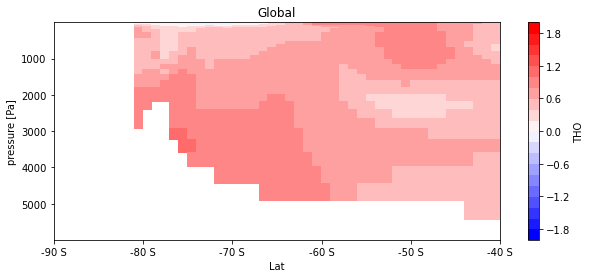

In [3]:
# %reset 
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
ds_1 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi400_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_P.nc')
#Eoi 400的数据有问题 不能直接减，后面减掉
ds_2 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi350_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_P.nc')
# print(ds_1)
# print(ds_2)
# ds=ds_1 - ds_2

# ds_1 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi400_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_A.nc')
# ds_2 = xr.open_dataset('/Users/zhengkai/Desktop/new_after/Eoi350_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_A.nc')
# ds=ds_1-ds_2
# print(ds)
# # print(ds['THO'])#加不加[:]好像无所谓
# # print(ds['THO'][1][:])#从左到右取维度，左边必须去到维度，在右边才能用:
# print(ds['THO'][:,:,:,0])#和matlab一样
# print(ds['THO']['lat'][2:10])


# THO=ds['THO'][:,:,:,0]
# THO_ANN=np.mean(THO,axis=0)
# %reset
# print(THO_ANN) 
# ax = plt.subplot(111)
# im = ax.imshow(THO_ANN)
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# plt.colorbar(im, cax=cax)


# THO_ANN=ds.mean(dim='time')
THO_ANN_400=ds_1.mean(dim=['time','lon'])['THO']
THO_ANN_350=ds_2.mean(dim=['time','lon'])['THO']
# print(THO_ANN)
THO_ANN=THO_ANN_400-THO_ANN_350
levels=np.arange(-2,2.1,0.2)
fig=THO_ANN.plot(figsize = (10, 4),cmap=plt.get_cmap('bwr'),levels=levels,xincrease=True, yincrease=False)
# cmap https://matplotlib.org/tutorials/colors/colormaps.html
plt.xlim(-90, -40)
# plt.ylim(2000,0)
x = np.arange(-90,-39,10)
print(x)
# print(list(x))  
labels=[str(i) +' S' if i<0 else str(i) +' N'  for  i in x]
print(labels)
plt.xticks(x,labels)
plt.xlabel('Lat')
plt.title("Global")
# # THO_ANN=ds.mean(dim='time')
# THO_ANN=ds.mean(dim=['time','lon'])['THO'][::-1]
# # print(THO_ANN)
# # THO_ANN.plot()
# THO_ANN[39].plot.line()
# # print(THO_ANN[1])

In [ ]:
# help( xr)
# dir(xr)

In [ ]:
from  netCDF4 import Dataset 
nc_file='/Users/zhengkai/Desktop/new_after/Eoi350_mpiom_last100year_wiso_catted.selvars_THO_ymonmean_r360x180_all.nc'
nc_obj = Dataset(nc_file)
# print(nc_obj.variables)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

ax = plt.subplot(111)
im = ax.imshow(np.arange(100).reshape((10, 10)))

# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#建立步长为0.01，即每隔0.01取一个点
step = 0.01
x = np.arange(-10,10,step)
y = np.arange(-10,10,step)
#也可以用x = np.linspace(-10,10,100)表示从-10到10，分100份

#将原始数据变成网格数据形式
X,Y = np.meshgrid(x,y)
#写入函数，z是大写
Z = X**2+Y**2
#设置打开画布大小,长10，宽6
#plt.figure(figsize=(10,6))
#填充颜色，f即filled
plt.contourf(X,Y,Z)
#画等高线
plt.contour(X,Y,Z)
plt.colorbar
plt.show()